## Bagging

In [91]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris


In [92]:
iris_data = load_iris()
iris_df = pd.DataFrame(data = iris_data['data'], columns = iris_data['feature_names'])


In [93]:
#iris_df.head()
iris_df['Iris type'] = iris_data['target']


In [94]:
def f(x):
    if x == 0:
        val = 'setosa'
    elif x == 1:
        val = 'versicolor'
    else:
        val = 'virginica'
    return val

In [95]:
iris_df['Species'] = iris_df['Iris type'].apply(f)


In [96]:
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


- same reasons what we did in voting classifier 
- to consider `sepal length (cm)` and `sepal width (cm)` and classes classes `virginica` and `versicolor`


In [97]:
new_iris_df = iris_df[iris_df['Iris type'] != 0][['sepal length (cm)','sepal width (cm)','Iris type']]
new_iris_df.shape

(100, 3)

## Plots for visualizing data

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

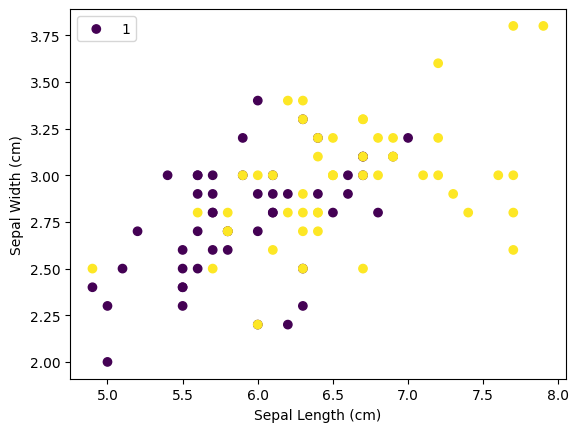

In [99]:
plt.scatter(
    new_iris_df["sepal length (cm)"], 
    new_iris_df['sepal width (cm)'],
    c = new_iris_df["Iris type"],
    cmap="viridis"
)

# Adding x-axis and y-axis labels
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(new_iris_df["Iris type"])


- will randomnly divide the data

In [100]:
# Taking only 10 rows for training
df = new_iris_df.sample(100) 
df_train = new_iris_df.iloc[:60,:].sample(10)
df_val = new_iris_df.iloc[60:80,:].sample(5)
df_test = new_iris_df.iloc[80:,:].sample(5)

- Now, `df` has rows which are not in any order; it is random.
- From `df`, we created three different datasets:
  - From the first 60 rows, we randomly selected 10 rows and considered it as training data.
  - From rows 60 to 80, we randomly selected 5 rows and considered it as validation data.


In [101]:
df_train

,sepal length (cm),sepal width (cm),Iris type
80,5.5,2.4,1
92,5.8,2.6,1
69,5.6,2.5,1
106,4.9,2.5,2
50,7.0,3.2,1
75,6.6,3.0,1
81,5.5,2.4,1
55,5.7,2.8,1
83,6.0,2.7,1
57,4.9,2.4,1


In [102]:
df_val

,sepal length (cm),sepal width (cm),Iris type
113,5.7,2.5,2
116,6.5,3.0,2
128,6.4,2.8,2
114,5.8,2.8,2
123,6.3,2.7,2


In [103]:
df_test

,sepal length (cm),sepal width (cm),Iris type
135,7.7,3.0,2
132,6.4,2.8,2
149,5.9,3.0,2
141,6.9,3.1,2
142,5.8,2.7,2


## Case 1: Bagging

- In this example, we will train 3 base models, all of which will be decision trees.
- The setup is: we have 10 rows of training data.
- For each of the 3 decision trees, we will use 80% of the data, i.e., 8 rows, for training.
- We will use sampling with replacement (`replace=True`), meaning the same row might appear multiple times in the dataset.
- This process will be repeated for all 3 decision trees, and each will be trained individually.


In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [105]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print("Accuracy:",accuracy_score(y_test,y_pred))

In [106]:
# Define X_test and y_test
X_test = df_test.iloc[:, 0:2]
y_test = df_test.iloc[:, -1]

In [107]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal length (cm),sepal width (cm),Iris type
80,5.5,2.4,1
83,6.0,2.7,1
80,5.5,2.4,1
81,5.5,2.4,1
55,5.7,2.8,1
69,5.6,2.5,1
75,6.6,3.0,1
106,4.9,2.5,2


In [108]:
dt_bag1 = DecisionTreeClassifier()


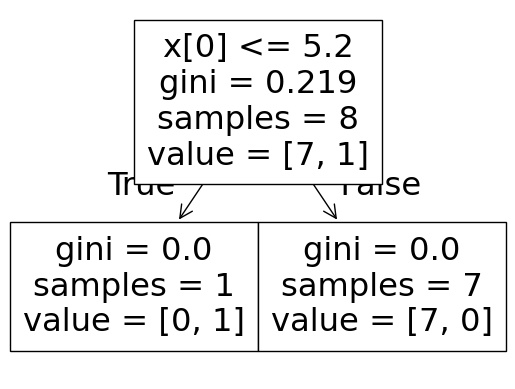

Accuracy: 0.0


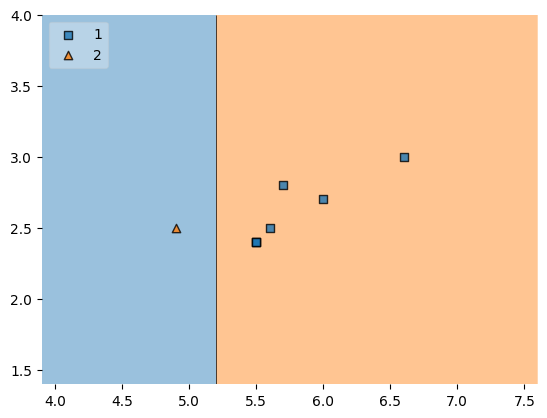

In [109]:
evaluate(dt_bag1,X,y)


In [110]:
# Data for Tree 2
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal length (cm),sepal width (cm),Iris type
57,4.9,2.4,1
69,5.6,2.5,1
81,5.5,2.4,1
106,4.9,2.5,2
69,5.6,2.5,1
80,5.5,2.4,1
83,6.0,2.7,1
81,5.5,2.4,1


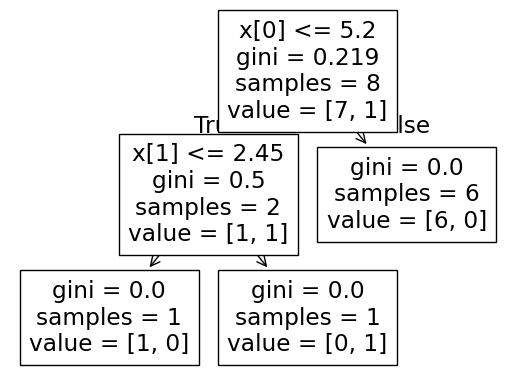

Accuracy: 0.0


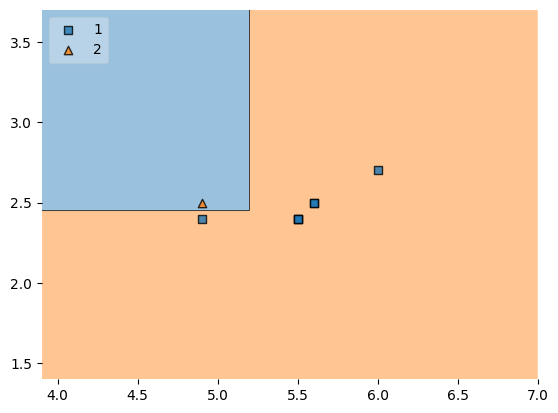

In [111]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [112]:
# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal length (cm),sepal width (cm),Iris type
55,5.7,2.8,1
50,7.0,3.2,1
55,5.7,2.8,1
106,4.9,2.5,2
50,7.0,3.2,1
81,5.5,2.4,1
69,5.6,2.5,1
106,4.9,2.5,2


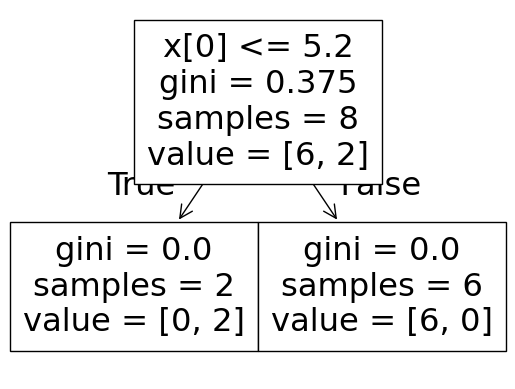

Accuracy: 0.0


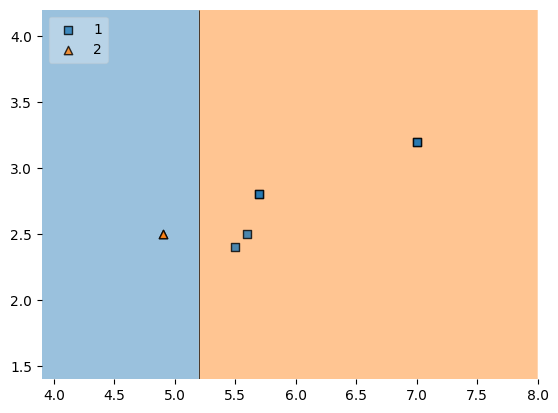

In [113]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

## Training Part: Bootstrapping

- We have completed the training part using bootstrapping.

## Aggregation Part: Prediction

- All 3 decision tree models have been trained on the training data.
- We will now use the test data to make predictions and evaluate the performance of the models.


In [114]:
df_test

,sepal length (cm),sepal width (cm),Iris type
135,7.7,3.0,2
132,6.4,2.8,2
149,5.9,3.0,2
141,6.9,3.1,2
142,5.8,2.7,2


- what will do indivisually will give our first row from our test data  to our model to predict class label to see how all 3 ase model are working 

In [115]:
print("Predictor 1",dt_bag1.predict(np.array([6.3, 3.4]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([6.3, 3.4]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([6.3, 3.4]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]


### Prediction Results

- For the test instance `[6.3, 3.4]`:
  - **Predictor 1**: Class label 1
  - **Predictor 2**: Class label 2
  - **Predictor 3**: Class label 1

- The actual class label is 2.
- Models 1 and 3 predicted class label 1, while Model 2 predicted class label 2.
- The majority vote (2) matches the actual class label, demonstrating how bagging works to aggregate predictions.


## Bagging Types

Bagging types depend on how the subsets are created. The method we used above was row sampling with replacement, but there are other approaches:

- **Row Sampling with Replacement**: The method used in the previous example where each base model is trained on a sample of rows with replacement.

- **Column Sampling**: For high-dimensional data like images or text, we can sample columns. For example, one decision tree might use one set of columns, while another uses a different set, or a combination of both.

Apart from bagging, there are three more types of sampling methods:

## 1. Pasting
- In pasting, we perform row sampling similar to bagging but **without replacement**. This means that rows are not repeated in the subsets.


In [116]:
# Row sampling without replacement
df_train

,sepal length (cm),sepal width (cm),Iris type
80,5.5,2.4,1
92,5.8,2.6,1
69,5.6,2.5,1
106,4.9,2.5,2
50,7.0,3.2,1
75,6.6,3.0,1
81,5.5,2.4,1
55,5.7,2.8,1
83,6.0,2.7,1
57,4.9,2.4,1


In [117]:
df_train.sample(8) # replace is by default false
# we can seee no rows are repeated


,sepal length (cm),sepal width (cm),Iris type
92,5.8,2.6,1
75,6.6,3.0,1
80,5.5,2.4,1
55,5.7,2.8,1
57,4.9,2.4,1
81,5.5,2.4,1
69,5.6,2.5,1
106,4.9,2.5,2


## 2. Random Subspaces

- In Random Subspaces, we perform **column sampling** rather than row sampling. This can be done with or without replacement.
- We select a subset of columns from the original dataframe for each base model.
- Example: Given an original dataframe with multiple features, we might create subsets with different combinations of columns for training each base model.


In [118]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [119]:
# will specify how many columns we want
# replace we have kept true so with replacement

iris_df.sample(2,replace=True,axis=1)


,Iris type,petal width (cm)
0,0,0.2
1,0,0.2
2,0,0.2
3,0,0.2
4,0,0.2
...,...,...
145,2,2.3
146,2,1.9
147,2,2.0
148,2,2.3


## 3. Random Patches

- In Random Patches, we perform **both row and column sampling**.
- This involves selecting a subset of rows and a subset of columns for each base model.
- The combination of row and column sampling introduces variety into the base models.
- Example: Given an original dataframe, we first select a random subset of rows and then a random subset of columns for training each base model.


In [120]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [121]:
# we have chained 2 samplings
iris_df.sample(8,replace=True).sample(2,replace=True,axis=1)


,sepal width (cm),sepal length (cm)
68,2.2,6.2
14,4.0,5.8
70,3.2,5.9
38,3.0,4.4
118,2.6,7.7
111,2.7,6.4
23,3.3,5.1
124,3.3,6.7


## Summary

The idea behind these techniques is to create **variety in base models** to improve their performance. This is achieved by providing different subsets of data to each model. There are four main types of methods to create this variety:

1. **Bagging** - Row sampling with replacement.
2. **Pasting** - Row sampling without replacement.
3. **Random Subspaces** - Column sampling (with or without replacement).
4. **Random Patches** - Both row and column sampling.

By using these methods, we enhance the diversity of the base models, leading to better overall model performance. Each method offers a unique way to sample the data, contributing to the robustness and accuracy of the final model ensemble.
